# Binary Search Tree. HW 5.4

# Lauren Bassett
# CS 5012
Last Updated: June 26, 2022

**INSTRUCTIONS**

Below is code for a Binary Search Tree Class. Seven of the methods in this implementation are incomplete (vacuous): `find`, `size`, `preorder`, `inorder`, `postorder`, \_\_str\_\_ and `height`. It is your task to complete them. Use the testing code to test and confirm your implementation. Submit the completed notebook file (BOTH the .ipynb and a rendered .html).

**Note:** Finding the height of a binary tree is a common tech interview question.

**POINT VALUES: (TOTAL=10)**  

| method| points |
| :----| ---- |
| find | 2   |
| size | 1   |
| inorder | 2   |
| preorder | 1   |
| postorder | 1   |
| str | 2   |
| height | 1  |

---

**ABOUT THE CLASSES**

The `Node` class describes the structure of a node in the tree: each node has a data item and can have a left and right child. 

The `BinarySearchTree` class is responsible for tree-level methods such as `buildBST`, inserting a data value in the right place/node in the BST tree (we populate the tree given a list data values through main), and the tree traversal methods.

---

What's the size of the tree?
9
What's the size of the tree?
0

In-order Tree Traversal:
1 3 4 6 7 8 10 13 14 
Pre-order Tree Traversal:
8 3 1 6 4 7 10 14 13 
Post-order Tree Traversal:
1 4 7 6 3 13 14 10 8 
Find 7: True
Find 5: False
Find 30: False


Display Figure of Tree:


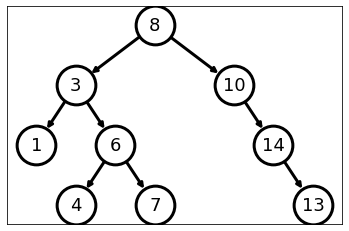

^^See Diagram above for Picture

Height of the Tree:
3


In [58]:
# -*- coding: utf-8 -*-
"""
Binary Search Tree
Plus tree traversal methods 

NOTE: I placed return statements immediately after the function declarations so 
you can run the code and see the print statments before beginning the assignment. 
HOWEVER ... You will need to move the return statements to the end of the functions
once you complete each function implementation :)
"""
import matplotlib.pyplot as plt
import networkx as nx

class Node:

      def __init__(self, data): # Constructor of Node class
            # A node has a data value, a left child node and a right child node
          self.data = data  #data item
          self.left = None  #left child, initially empty
          self.right = None #right child, initially empty


      def __str__(self): # Printing a node

          return str(self.data) #return as string

# ===================================================================
# ===================================================================

class BinarySearchTree:

      def __init__(self): # Constructor of BinarySearchTree class

          self.root = None  # Initially, an empty root node
          self.edge_tup = [] #Initally an empty array
          self.pos = {}

# ===================================================================
      def buildBST(self, val):  # Build ("create") a binary search tree 
         
          if self.root == None:

             self.root = Node(val)
          

          else:

             current = self.root
         
             while 1:

                 if val < current.data:

                   if current.left:
                      current = current.left  # Go left...
                   else:
                      self.edge_tup.append((current.data, val))
                      current.left = Node(val)  # Left child is empty; place value here
                  
                      break;      

                 elif val > current.data:
                 
                    if current.right:
                       current = current.right  # Go right...
                    else:
                       self.edge_tup.append((current.data, val))
                       current.right = Node(val)  # Right child is empty; place value here
                       break;      

                 else:             
                    break 
       


# ===================================================================
      
      def find(self, target):  # Find a node with the 'target' value in the BST
            '''
            returns true if found, false otherwise
            '''
            if self.root == None:
                  return False
            
            current = self.root
            while 1:
            ## TODO:  Complete this method! ##
                  if target == current.data:
                        return True
                  elif target < current.data:
                        if current.left == None:
                              return False
                        else:
                              current = current.left
                  elif current.right == None:
                        return False
                  else:
                        current = current.right
      

# ===================================================================
      def size(self, node): # Counts the number of nodes in the BST
            '''
            returns number of nodes
            '''
            ## TODO:  Complete this method! ##
            if node==None:
                  return 0
            else:
                  return(self.size(node.left)+ self.size(node.right) + 1) 

          

# ===================================================================
      def inorder(self, node): # Performing in-order tree traversal
            '''
            prints values as encountered inorder
            '''    
      
            ## TODO:  Complete this method! ##
            if node.left != None:
                  self.inorder(node.left)
            if node.data != None:
                  print(node.data,end=" ")
            if node.right != None:
                  self.inorder(node.right)
      
# ===================================================================
      def preorder(self, node): # Performing pre-order tree traversal
            '''
            prints values as encountered preorder
            '''       
            if node.data != None:
                  print(node.data, end = " ")
            if node.left != None:
                  self.preorder(node.left)
            if node.right != None:
                  self.preorder(node.right)      
            ## TODO:  Complete this method! ##

# ===================================================================
      def postorder(self, node):   # Performing post-order tree traversal
            '''
            prints values as encountered postorder
            '''            
            ## TODO:  Complete this method! ##
            if node.left != None:
                  self.postorder(node.left)
            if node.right != None:
                  self.postorder(node.right)
            if node.data != None:
                  print(node.data, end = " ")
# ===================================================================
      def __str__(self):
            '''
            Builds networkx visualization of the BST

            The purpose of this method is to render a visualization of a constructed BST
            Tree to confirm correctness. 

            Hint: To complete this you will need to create a node list, edge list, and/or 
            an adjacency matrix. You can then easily construct a graph visualization using networkx.
        
            Slightly alter one of your traversal methods (or the buildBST method) 
            above so that the appropriate structure(s) is constructed and saved as 
            an attribute(s) to the BST class, eg, edgeList.

            Hint: Use a directed graph (DiGraph) so you can more easily 
            identify the root, leaf, and internal nodes. The standard networkx method 
            draw will suffice. It will render the tree as a standard graph (ie no clear root),
            but you can determine which node is the root if you use a DiGraph. 

            Once the graph is constructed, a plot is created. 
            '''
            G = nx.DiGraph()

            G.add_edges_from(self.edge_tup)
     
            # explicitly set positions
            #I am doing this because I want it to look really nice, but the edges are set in the loop
            #I would probably assign this dynamically using some recursion (+2 for each time you go left, -2 for each time you move right
            # + 3 every level deeper you go, but since this isn't part of the assignment, I am going to manually
            # code it for now.)
            pos = {8: (9,9), 3: (5, 6), 1: (3, 3), 6: (7, 3), 4: (5, 0), 7:(9, 0), 10:(13, 6), 14:(15, 3), 13:(17, 0) }

            options = {
                  "font_size": 18,
                  "node_size": 1500,
                  "node_color": "white",
                  "edgecolors": "black",
                  "linewidths": 3,
                  "width": 3,
            }
                                    

          # Revisit previous exercises and examples using Networkx to help!
            # See docs here to help https://networkx.org/documentation/stable/tutorial.html
            # Insert Code to diplay figure here
            nx.draw_networkx(G, pos, **options)
            plt.show()
            return("^^See Diagram above for Picture")
                  
# ===================================================================            
      def height(self, node):  # Performing post-order tree traversal
            '''
            prints tree height
            '''     
            ## TODO:  Complete this method! ##
            if node == None:
                  return -1
            left = self.height(node.left)
            right = self.height(node.right)
            return(1+ max(left, right))

# ===================================================================

##################                  
## Testing Code ##
##################                        
                        
tree = BinarySearchTree()    
treeEmpty = BinarySearchTree()  # Empty tree

branches = []
arr = [8,3,1,6,4,7,10,14,13]    # Array of nodes (data items)
for i in arr:                   # For each data item, build the Binary Search Tree
    tree.buildBST(i)

print('What\'s the size of the tree?')
print(tree.size(tree.root))     # size method

print('What\'s the size of the tree?')
print(treeEmpty.size(treeEmpty.root))

print("") 
print ('In-order Tree Traversal:')
tree.inorder(tree.root)         # Perform in-order tree traversal, and print
 
print("") 
print ('Pre-order Tree Traversal:')
tree.preorder(tree.root)        # Perform pre-order tree traversal, and print

print("")
print ('Post-order Tree Traversal:')
tree.postorder(tree.root)       # Perform post-order tree traversal, and print

print("")
print ('Find 7:', end=" ")      # find method
print(tree.find(7))

print('Find 5:', end=" ")
print(tree.find(5))

print('Find 30:', end=" ")
print(tree.find(30))

print("")
print("")
print ('Display Figure of Tree:')
print(tree) 

print("")
print('Height of the Tree:')
print(tree.height(tree.root))